In [ ]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('/content/Wholesale customers data.xlsx')

## Performing EDA

In [ ]:
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
df.shape

(440, 8)

There are 440 instances and 8 attributes in Wholesale customers dataset.

In [ ]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


There are no missing values in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


There are no null value in the dataset and all the columns have numeric datatype.

There are 6 continuous types of features in the dataset:
1. Fresh
2. Milk
3. Grocery
4. Frozen
5. Detergents_Paper
6. Delicassen


There are 2 categoricals features in the dataset:
1. Channel
2. Region

<Axes: xlabel='Channel', ylabel='count'>

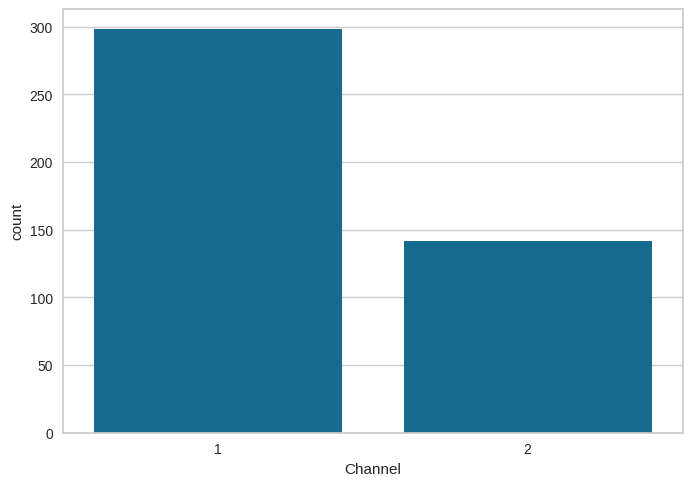

In [ ]:
# countplot to count categorical variable Channel
sns.countplot(x=df["Channel"])

Channel variable contains values as 1 and 2.

<Axes: xlabel='Region', ylabel='count'>

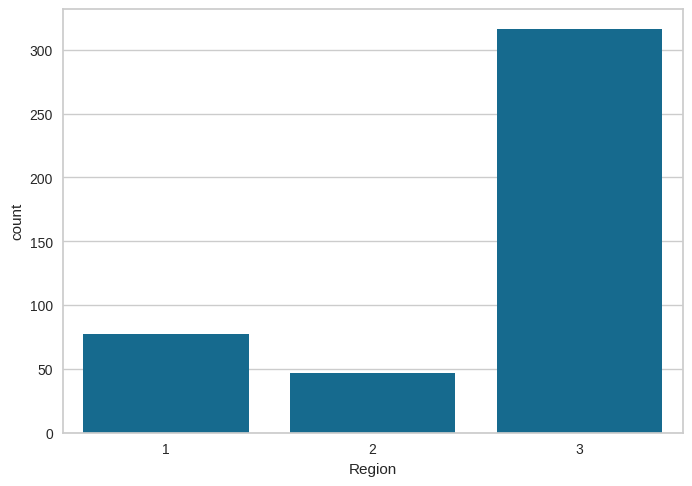

In [ ]:
# countplot to count categorical variable Region
sns.countplot(x=df["Region"])

Region column contains 3 unique values. 1,2 and 3.

Correlation analysis:

Text(0.5, 1.0, 'Correlation of features of Wholesale customers dataset')

<Figure size 800x550 with 0 Axes>

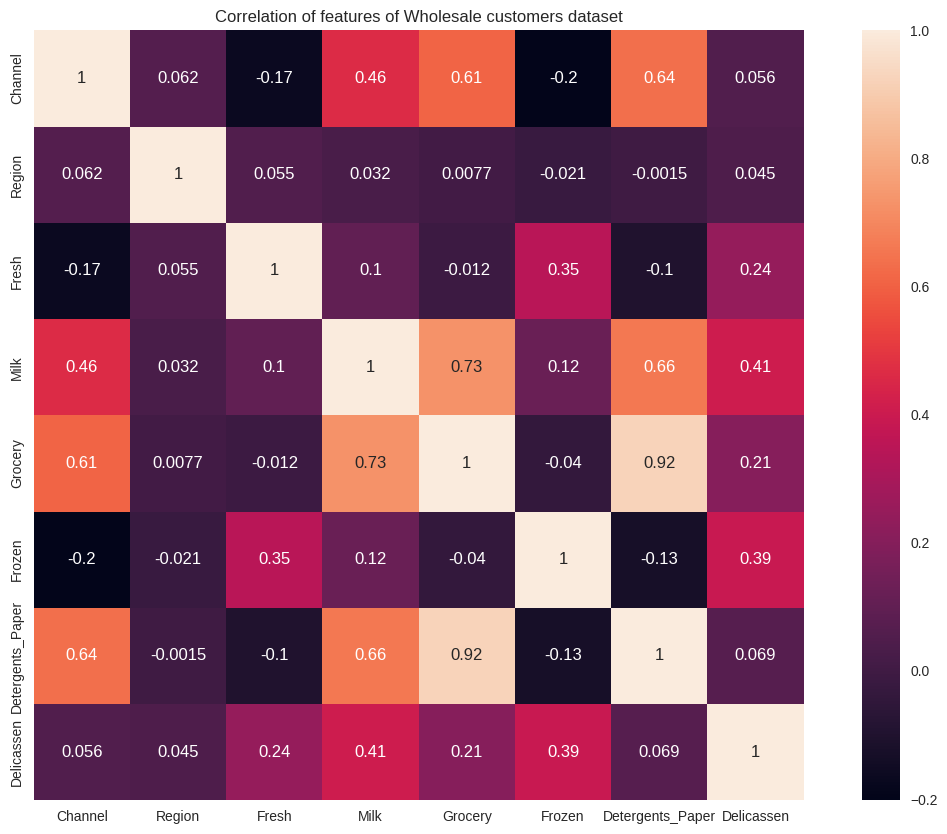

In [ ]:
plt.figure(1)
fig,ax= plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(df.corr(), square=True, annot=True)
plt.title('Correlation of features of Wholesale customers dataset')

## Conclusion:
Some features show some degree of correlation which are as below:

1. Grocery and Detergents_Paper are highly correlated = 0.92
2. Milk and Groceries = 0.73
3. Milk and Detergents_Paper = 0.66

## Feature Scaling to Normalize the data using StandardScaler

### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaled_values = StandardScaler().fit_transform(df)
df_scaler = pd.DataFrame(scaled_values, columns=df.columns)

In [ ]:
df_scaler.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


<Axes: ylabel='Density'>

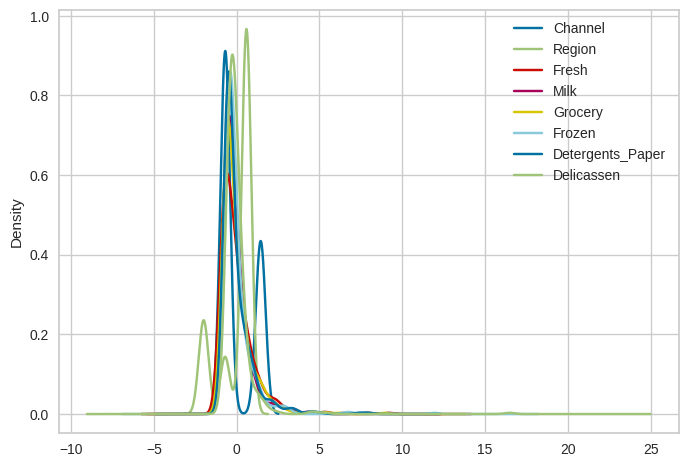

In [ ]:
pd.DataFrame(df_scaler).plot(kind = 'kde')

<Axes: ylabel='Frequency'>

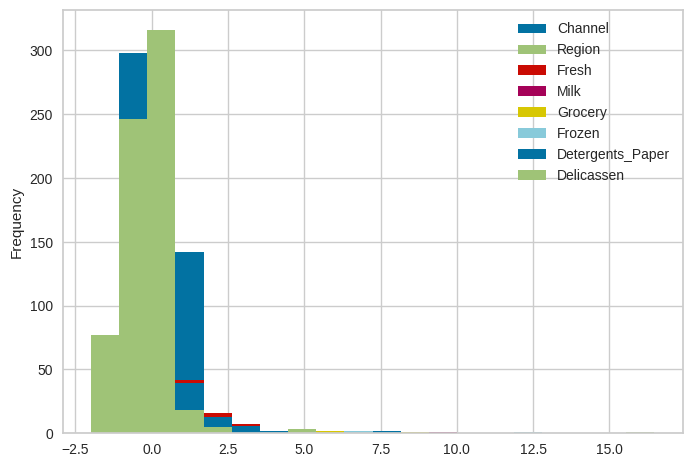

In [ ]:
pd.DataFrame(df_scaler).plot(kind='hist', bins=20)

### Conclusion:
Standardscaler has scaled data with zero mean and one standard deviation. And Standardscaler shows centered curves with no outliers. Standardscaler is beneifitial when it comes to outlier.

## Finding optimal number of features using RFECV and showing the plot between Number of features selected vs Cross validation score (using channel as target variable).

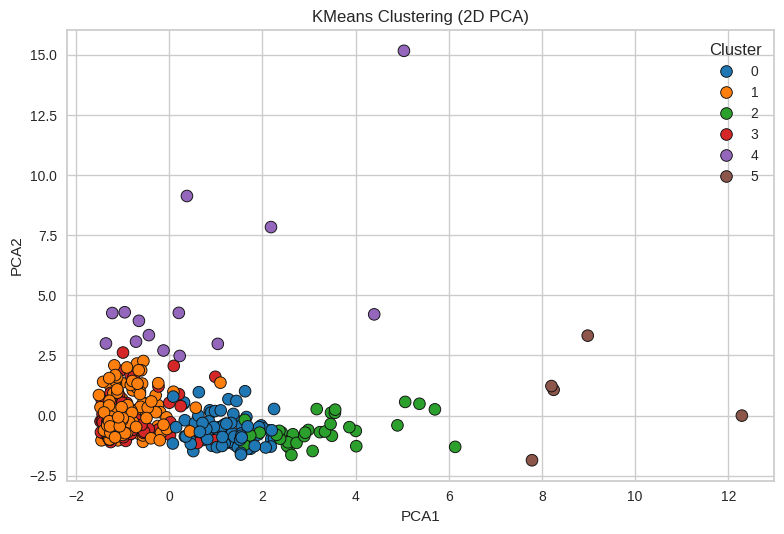

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scale → KMeans → PCA
scaled = StandardScaler().fit_transform(df)
labels = KMeans(n_clusters=6, random_state=42).fit_predict(scaled)
pca_2d = PCA(n_components=2).fit_transform(scaled)

# Create plot data
plot_df = pd.DataFrame(pca_2d, columns=['PCA1', 'PCA2'])
plot_df['Cluster'] = labels

# Plot
sns.scatterplot(data=plot_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=70, edgecolor='k')
plt.title('KMeans Clustering (2D PCA)')
plt.tight_layout()
plt.show()
